<a href="https://colab.research.google.com/github/Myeong-bin/test1/blob/main/chapter02_mathematical_building_blocks_i(3_20).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ???

Some questions

-How many samples in Mnisttest dataset?  

-What is a dimension for minstdata?  

-Try to create a 3D tensor object. (with any values you like)

-Try to visualize the 1stdigit from mnisttest dataset (1stdigit data = test_images[0])

-Try to manipulate and visualize the 1stdigit data


\\
Some questions

-Try to use naïve version of reluand add functions.

-Why we use x.copy() ?

-Why the naïve version of the code slower?

-Try to use broadcasting with your own example.

-Explain your broadcasting example to your teammates

-Try reshaping code and explain it to teammates.

\\
Some questions-Say x, y are scalar, find derivatives of with respect to x and y. (Set x = 2, y = 1 for the calculation)

-Set x, W and b asx=tf.constant(np.array([1.,4.,3.]).reshape(1,3),dtype=tf.float32)W=tf.Variable(tf.random.uniform((3,2)),dtype=tf.float32)b=tf.Variable(tf.zeros((2,)),dtype=tf.float32)

-Find derivatives of                                 with respect to W and b. (Hint: search for tf.pow() )

-Find derivatives of                                 with respect to W and b.


\\
Some questions

-Check weights from defined models.

-Try running Naïve version of model and check weights.

## The mathematical building blocks of neural networks

## 1. A first look at a neural network

**Loading the MNIST dataset in Keras**

In [ ]:
# MNIST 데이터셋을 불러오고, 훈련 데이터와 레이블, 테스트 데이터와 레이블을 로드

from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

In [ ]:
len(train_labels)

60000

In [ ]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
len(test_labels)

10000

In [ ]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

**The network architecture**

In [ ]:
# Sequential 모델을 생성하고, 이 모델에 두 개의 Dense 레이어를 추가합니다.
# 첫 번째 Dense 레이어는 512개의 뉴런과 ReLU 활성화 함수를 사용하고, 두 번째 레이어는 10개의 뉴런과 softmax 활성화 함수를 사용

from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

**The compilation step**

In [ ]:
# rmsprop 대신 adam 쓰기도 함
# 모델을 컴파일합니다.
# 여기서는 'rmsprop' 옵티마이저를 사용하고, 손실 함수로 'sparse_categorical_crossentropy'를 사용합니다.
# 또한 모델의 성능 지표(metrics)로 정확도('accuracy')를 사용

model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

**Preparing the image data**

In [ ]:
# 이미지 데이터를 모델에 적합한 형태로 reshape하고, 픽셀 값의 범위를 0과 1 사이로 정규화합니다.

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

**"Fitting" the model**

In [ ]:
# 모델을 훈련합니다. 훈련 이미지와 레이블을 사용하여 모델을 학습하고, 5번의 epoch 동안 학습을 진행

model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 3s 3ms/step - loss: 0.2625 - accuracy: 0.9243
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1066 - accuracy: 0.9690
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0703 - accuracy: 0.9793
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0500 - accuracy: 0.9846
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0376 - accuracy: 0.9892


**Using the model to make predictions**

In [ ]:
# 테스트 데이터에서 일부 이미지에 대한 예측을 수행합니다. 모델의 predict 메서드를 사용하여 예측값을 계산

test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

1/1 [==============================] - 0s 69ms/step


array([2.8630678e-08, 1.4859067e-08, 5.0678018e-06, 1.5953682e-04,
       9.8298543e-11, 2.1272131e-08, 4.2316060e-12, 9.9983478e-01,
       2.8577526e-07, 3.1551181e-07], dtype=float32)

In [ ]:
predictions[0].argmax()

7

In [ ]:
predictions[0][7]

0.9998348

In [ ]:
test_labels[0]

7

**Evaluating the model on new data**

In [ ]:
# 테스트 이미지를 사용하여 모델의 성능을 평가합니다.
# evaluate 함수를 사용하여 테스트 데이터에 대한 손실(loss)과 정확도(accuracy)를 계산하고 출력

test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 [==============================] - 1s 2ms/step - loss: 0.0654 - accuracy: 0.9805
test_acc: 0.9804999828338623


## 2. Data representations for neural networks

In [ ]:
# 코드 총합본

import numpy as np
x = np.array(12)
x
x.ndim

x = np.array([12, 3, 6, 14, 7])
x
x.ndim

x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
x.ndim

x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])
x.ndim

from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images.ndim

train_images.shape

import matplotlib.pyplot as plt
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

train_labels[4]

train_images.shape

my_slice = train_images[10:100]
my_slice.shape

my_slice = train_images[10:100, :, :] # 데이터 전체 선택
my_slice.shape

my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

my_slice = train_images[:, 14:, 14:]

my_slice = train_images[:, 7:-7, 7:-7]

digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

batch = train_images[:128]
batch = train_images[128:256]
n = 3
batch = train_images[128 * n:128 * (n + 1)]

### Scalars (rank-0 tensors)

In [ ]:
import numpy as np
x = np.array(12)
x

array(12)

In [ ]:
x.ndim

0

### Vectors (rank-1 tensors)

In [ ]:
x = np.array([12, 3, 6, 14, 7])
x

array([12,  3,  6, 14,  7])

In [ ]:
x.ndim

1

### Matrices (rank-2 tensors)

In [ ]:
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
x.ndim

2

### Rank-3 and higher-rank tensors

In [ ]:
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])
x.ndim

3

### Key attributes

In [ ]:
# MNIST 데이터셋을 불러오고,

from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
# 훈련 이미지의 차원과 모양을 확인

train_images.ndim

3

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
train_images.dtype

dtype('uint8')

**Displaying the fourth digit**

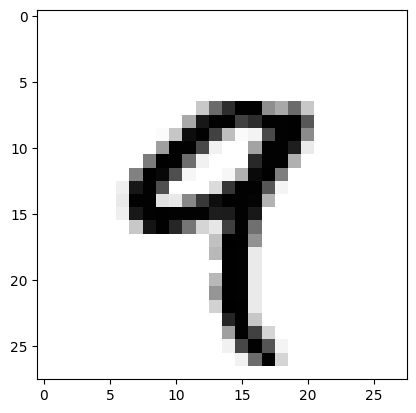

In [ ]:
# matplotlib를 사용하여 이미지를 시각화하고, 해당 이미지에 대한 레이블을 확인

import matplotlib.pyplot as plt
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [ ]:
train_labels[4]

9

### Manipulating tensors in NumPy

이미지 데이터에서 일부 영역을 슬라이싱하여 추출


In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
my_slice = train_images[10:100]
my_slice.shape

(90, 28, 28)

In [ ]:
my_slice = train_images[10:100, :, :] # 데이터 전체 선택
my_slice.shape

(90, 28, 28)

In [ ]:
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

In [ ]:
my_slice = train_images[:, 14:, 14:]

In [ ]:
my_slice = train_images[:, 7:-7, 7:-7]

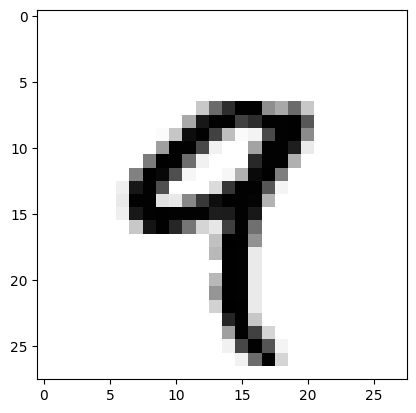

In [ ]:
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

- How many samples in Mnisttest dataset?

: 60000

- What is a dimension for minstdata(try ndim method on mnist training data)?

: 3

- Try to create a 3D tensor object. (with any values you like)

: slice 숫자를 바꿔서

- Try to visualize the 1st digit from mnisttest dataset (1stdigit data = test_images[0])

:

- Try to manipulate and visualize the 1stdigit data

### The notion of data batches

이미지 데이터에서 배치를 추출하는 방법

In [ ]:
batch = train_images[:128]

In [ ]:
batch = train_images[128:256]

In [ ]:
n = 3
batch = train_images[128 * n:128 * (n + 1)]

### Real-world examples of data tensors

### Vector data

### Timeseries data or sequence data

### Image data

### Video data

## 3. The gears of neural networks: tensor operations

수업 중 퀴즈

Try to naive version of relu and add functions

why we use x.copy()? >> overwrite

why the naive version of the code slower?

try to use broadcasting with your own example

explain your broadcasting example

### Element-wise operations

In [ ]:
# ReLU(Rectified Linear Unit) 활성화 함수를 수행하는 함수

def naive_relu(x):
    assert len(x.shape) == 2
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

In [ ]:
# 두 개의 행렬을 더하는 함수입니다. 주어진 두 행렬의 각 원소를 더한 결과를 반환

def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

In [ ]:
import time

x = np.random.random((20, 100))
y = np.random.random((20, 100))

t0 = time.time()
for _ in range(1000):
    z = x + y
    z = np.maximum(z, 0.)
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 0.01 s


In [ ]:
t0 = time.time()
for _ in range(1000):
    z = naive_add(x, y)
    z = naive_relu(z)
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 1.92 s


시간이 차이가 나는 이유 : 아래의 경우는 naive_add에서 for 루프를 돌리기 때문

### Broadcasting

In [ ]:
import numpy as np
X = np.random.random((32, 10)) # 2차원, 32개의 벡터 with 10개 원소
y = np.random.random((10,)) # 1차원, 10개의 벡터

In [ ]:
y = np.expand_dims(y, axis=0) # 3차원으로 확장
y

array([[[[0.12025154, 0.74779174, 0.76440884, 0.72761554, 0.93065789,
          0.78068536, 0.20585644, 0.16249032, 0.91900506, 0.35798022]]]])

In [ ]:
Y = np.concatenate([y] * 32, axis=0) # 3차원, 32개로 복제

In [ ]:
# 행렬 x와 벡터 y를 더하는 함수(x의 차원이 2이고, y의 차원이 1)

def naive_add_matrix_and_vector(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[j]
    return x

In [ ]:
import numpy as np
x = np.random.random((64, 3, 32, 10)) # 64개의 행렬 / 각 행렬은 3차원 배열로 구성되며 / 이 배열은 32개의 행과 10개의 열로 이루어져 있습니다
y = np.random.random((32, 10)) # 32개의 행과 10개의 열로 이루어진 2차원 배열
z = np.maximum(x, y) # 브로드캐스팅을 사용하여 두 배열 x와 y 간의 요소별 최대값을 계산

"브로드캐스팅"을 활용하여 텐서의 크기를 맞추고, 해당 위치의 요소들끼리 연산을 수행합니다. 따라서 x와 y의 크기가 서로 다르더라도 브로드캐스팅을 통해 적절히 확장되어 연산이 이루어집니다.

x와 y 배열 각 요소들을 비교하고, 더 큰 값을 가진 요소를 새로운 배열 z의 해당 위치에 할당합니다. 이 과정은 브로드캐스팅을 통해 이루어지므로, x와 y의 크기가 다르더라도 올바른 결과를 산출합니다.

두 개의 배열 x와 y를 생성합니다. x는 크기가 (64, 3, 32, 10)인 4차원 배열이고, y는 크기가 (32, 10)인 2차원 배열입니다.

그런 다음, np.maximum(x, y)를 사용하여 요소별 최대값을 계산합니다. 이 함수는 주어진 두 배열에서 동일한 위치에 있는 요소들을 비교하고, 더 큰 값을 가진 요소를 결과 배열에 저장합니다. 이때, 브로드캐스팅이 사용되어 y 배열이 (64, 3, 32, 10)으로 확장되어 x와 동일한 형태로 되고, 그 후에 요소별로 비교하여 최대값을 계산합니다.

결과적으로 z 배열은 x와 y의 각 위치에 있는 요소 중에서 최대값으로 이루어진 배열이 됩니다. 이렇게 함으로써 x 배열의 각 요소와 y 배열의 동일한 위치에 있는 요소를 비교하여 더 큰 값을 유지하는 연산이 수행됩니다.

첨언으로, 주어진 두 개의 배열 x와 y가 다른 차원을 갖고 있습니다. x는 4차원 배열이고 y는 2차원 배열입니다. 이러한 경우 NumPy는 브로드캐스팅 규칙에 따라 차원을 맞추어 요소별 연산을 수행합니다. 브로드캐스팅은 두 배열을 자동으로 확장하여 동일한 형태로 만든 후에 요소별 연산을 수행하는 메커니즘입니다. 따라서 y 배열이 (64, 3, 32, 10)으로 확장되어 x와 동일한 형태가 되고, 그 후에 요소별로 비교하여 최대값을 계산합니다.

### Tensor product

In [ ]:
x = np.random.random((32,))
y = np.random.random((32,))
z = np.dot(x, y)

In [ ]:
# x와 y의 내적(dot product)을 계산

def naive_vector_dot(x, y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    z = 0.
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z

In [ ]:
# 행렬 x와 벡터 y 사이의 행렬-벡터 곱셈을 계산

def naive_matrix_vector_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i, j] * y[j]
    return z

In [ ]:
# 행렬 x와 벡터 y 사이의 행렬-벡터 곱셈을 계산

def naive_matrix_vector_dot(x, y):
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        z[i] = naive_vector_dot(x[i, :], y)
    return z

In [ ]:
# 두 개의 행렬 x와 y의 행렬-행렬 곱셈을 계산

def naive_matrix_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 2
    assert x.shape[1] == y.shape[0]
    z = np.zeros((x.shape[0], y.shape[1]))
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            row_x = x[i, :]
            column_y = y[:, j]
            z[i, j] = naive_vector_dot(row_x, column_y)
    return z

### Tensor reshaping

In [ ]:
train_images = train_images.reshape((60000, 28 * 28))

In [ ]:
x = np.array([[0., 1.],
             [2., 3.],
             [4., 5.]])
x.shape

(3, 2)

In [ ]:
x = np.array([[0,1],[1,2]])
x.reshape((4,1))

array([[0],
       [1],
       [1],
       [2]])

In [ ]:
x = x.reshape((6, 1))
x

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [ ]:
x = np.zeros((300, 20))
x = np.transpose(x)
x.shape

(20, 300)

### Geometric interpretation of tensor operations

### A geometric interpretation of deep learning

## 4. The engine of neural networks: gradient-based optimization

### What's a derivative?

### Derivative of a tensor operation: the gradient

### Stochastic gradient descent

### Chaining derivatives: The Backpropagation algorithm

#### The chain rule

#### Automatic differentiation with computation graphs

#### (**문제풀이**)The gradient tape in TensorFlow : find derivatives

**답안은 사진 확인**

say x,y are scalar, find derivatives of f(x,y)=x^2y+xy+3y with respect to x and y.

set x=2 , y=1 for the calculation

\
set x,W and b as

x=tf.constant(np.array([1.,4.,3.]).reshape(1,3), dtype=tf.float32)

W=tf.Variable(tf.random.uniform((3,2)), dtype=tf.float32)

b=tf.Variable(tf.zeros((2,)), dtype=tf.float32)

\
find derivatives of f(W,b)=(xW+b) with respect to W and b

search ftn tf.pow()

In [ ]:
# TensorFlow를 사용하여 변수에 대한 그래디언트(기울기)를 계산하는 방법

import tensorflow as tf
x = tf.Variable(2.) # Variable을 사용하여 변수 x와 y를 생성
y = tf.Variable(1.) # 0이 아닌 0.으로 써야 함! 즉 float 으로 서야 함

#  z를 x와 y에 대해 계산한 함수로 정의하고, tape.gradient()를 사용하여 z에 대한 x와 y의 그래디언트를 계산
with tf.GradientTape() as tape:
    z = x*x*y + x*y + 3*y

grad_of_z_wrt_xy = tape.gradient(z, [y, x])

In [ ]:
grad_of_z_wrt_xy

[<tf.Tensor: shape=(), dtype=float32, numpy=9.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=5.0>]

In [ ]:
##### 과제 문제 풀이

# tf.constant를 사용하여 상수 텐서 x를 생성
x=tf.constant(np.array([1.,4.,3.]).reshape(1,3), dtype=tf.float32)

# Variable을 사용하여 가중치 행렬 W와 편향 벡터 b를 생성
W=tf.Variable(tf.random.uniform((3,2)), dtype=tf.float32)
b=tf.Variable(tf.zeros((2,)), dtype=tf.float32)

# tf.GradientTape()를 사용하여 그래디언트를 계산할 연산을 기록
with tf.GradientTape() as tape:
    z = tf.matmul(x, W) + b

# tape.gradient()를 사용하여 z에 대한 W와 b의 그래디언트를 계산
grad_of_y_wrt_W_and_b = tape.gradient(z, [W, b])

## 5. Looking back at our first example

이미지 픽셀 값을 0에서 255 사이의 정수에서 0과 1 사이의 부동 소수점 수로 정규화 >> 픽셀 값이 0에서 1 사이의 값을 갖도록

여기서 (60000, 28 * 28)는 훈련 이미지 데이터의 모양(shape)을 의미합니다. 총 60,000개의 이미지가 있고, 각 이미지는 28x28 크기의 배열로 표현되며, 이를 1D 배열로 재구성하여 각 이미지가 784개의 요소를 가진 벡터로 변환합니다.

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data() # MNIST 데이터셋을 로드
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

Sequential 모델은 층을 선형으로 연결하여 구성되며, 입력은 첫 번째 층에서 출력되고, 그 출력은 다음 층의 입력으로 전달됩니다. 따라서 각 층은 이전 층의 출력에 대한 함수입니다.

이 모델은 주어진 이미지를 입력으로 받아, 512개의 뉴런을 가진 은닉층을 거쳐 10개의 클래스에 대한 확률을 출력합니다.

첫 번째 층 (layers.Dense(512, activation="relu")): 512개의 뉴런으로 이루어진 fully connected 층입니다. 활성화 함수로는 ReLU(Rectified Linear Unit) 함수가 사용됩니다. 이 층은 입력 데이터의 선형 변환을 수행하고 비선형성을 추가합니다.

두 번째 층 (layers.Dense(10, activation="softmax")): 10개의 뉴런으로 이루어진 fully connected 층입니다. 활성화 함수로는 소프트맥스(softmax) 함수가 사용됩니다. 이 층은 클래스별 확률을 출력하며, 다중 클래스 분류 문제에서 사용됩니다.

In [ ]:
# 모델을 컴파일하는 단계 >> 학습 프로세스를 설정

model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

# 훈련 데이터셋을 5번 반복, 한 번의 반복에서 128개의 이미지와 레이블을 사용하여 모델을 업데이트

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 0.2675 - accuracy: 0.9232
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1099 - accuracy: 0.9682
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0724 - accuracy: 0.9788
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0525 - accuracy: 0.9843
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0394 - accuracy: 0.9887


### Reimplementing our first example from scratch in TensorFlow

#### A simple Dense class

In [ ]:
import tensorflow as tf

class NaiveDense:
    def __init__(self, input_size, output_size, activation):
        self.activation = activation

        w_shape = (input_size, output_size)
        w_initial_value = tf.random.uniform(w_shape, minval=0, maxval=1e-1)
        self.W = tf.Variable(w_initial_value)

        b_shape = (output_size,)
        b_initial_value = tf.zeros(b_shape)
        self.b = tf.Variable(b_initial_value)

    def __call__(self, inputs):
        return self.activation(tf.matmul(inputs, self.W) + self.b)

    @property
    def weights(self):
        return [self.W, self.b]

In [ ]:
NaiveDense(input_size=228, output)

#### A simple Sequential class

In [ ]:
class NaiveSequential:
    def __init__(self, layers):
        self.layers = layers

    def __call__(self, inputs):
        x = inputs
        for layer in self.layers:
           x = layer(x)
        return x

    @property
    def weights(self):
       weights = []
       for layer in self.layers:
           weights += layer.weights
       return weights

In [ ]:
# 모델 생성

model = NaiveSequential([
    NaiveDense(input_size=28 * 28, output_size=512, activation=tf.nn.relu),
    NaiveDense(input_size=512, output_size=10, activation=tf.nn.softmax)
])
assert len(model.weights) == 4

#### A batch generator

In [ ]:
import math

class BatchGenerator:
    def __init__(self, images, labels, batch_size=128):
        assert len(images) == len(labels)
        self.index = 0
        self.images = images
        self.labels = labels
        self.batch_size = batch_size
        self.num_batches = math.ceil(len(images) / batch_size)

    def next(self):
        images = self.images[self.index : self.index + self.batch_size]
        labels = self.labels[self.index : self.index + self.batch_size]
        self.index += self.batch_size
        return images, labels

### Running one training step

In [ ]:
# 학습 함수 정의

def one_training_step(model, images_batch, labels_batch):
    with tf.GradientTape() as tape:
        predictions = model(images_batch)
        per_sample_losses = tf.keras.losses.sparse_categorical_crossentropy(
            labels_batch, predictions)
        average_loss = tf.reduce_mean(per_sample_losses)
    gradients = tape.gradient(average_loss, model.weights)
    update_weights(gradients, model.weights)
    return average_loss

In [ ]:
learning_rate = 1e-3

def update_weights(gradients, weights):
    for g, w in zip(gradients, weights):
        w.assign_sub(g * learning_rate)

In [ ]:
from tensorflow.keras import optimizers

optimizer = optimizers.SGD(learning_rate=1e-3)

def update_weights(gradients, weights):
    optimizer.apply_gradients(zip(gradients, weights))

### The full training loop

In [ ]:
def fit(model, images, labels, epochs, batch_size=128):
    for epoch_counter in range(epochs):
        print(f"Epoch {epoch_counter}")
        batch_generator = BatchGenerator(images, labels)
        for batch_counter in range(batch_generator.num_batches):
            images_batch, labels_batch = batch_generator.next()
            loss = one_training_step(model, images_batch, labels_batch)
            if batch_counter % 100 == 0:
                print(f"loss at batch {batch_counter}: {loss:.2f}")

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

# 학습
fit(model, train_images, train_labels, epochs=10, batch_size=128)

### Evaluating the model

In [ ]:
model.weights

In [ ]:
# 예측 및 평가

predictions = model(test_images)
predictions = predictions.numpy()
predicted_labels = np.argmax(predictions, axis=1)
matches = predicted_labels == test_labels
print(f"accuracy: {matches.mean():.2f}")

accuracy: 0.82


## Summary